

<h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 30px; color: #081c15; text-align: center; line-height: 1.25;">Classification Problem<br><span style="color: #1b4332; font-size: 48px"><b>🐛Software defect🐛</b>
 <hr>
<h1 style="font-family: Trebuchet MS; font-size: 14px; color: #264653; text-align: right; "><strong>Created By: Hassane Skikri</strong></h1>



# <p style="background-color:#40BF80; font-family:newtimeroman;color:#FFFFFF; font-size:150% ; text-align:center; border-radius: 50px 15px;"> 🔻1️⃣ Importing libraries 🔻</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#set the display option so we could see all the columns in pd dataframe
pd.set_option('display.max_columns',None)

# <p style="background-color:#40BF80; font-family:newtimeroman;color:#FFFFFF; font-size:150% ; text-align:center; border-radius: 50px 15px;"> 🔻 2️⃣ Reading and Cleaning Data 🔻</p>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140% ; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Reading Data⬇️</p>

In [3]:
path="../Data"
train = pd.read_csv(path+"/train.csv")
test = pd.read_csv(path+"/test.csv")
sub=pd.read_csv(path+"/sample_submission.csv")
original=pd.read_csv(path+"/jm1.csv")

# deleting the id column
train.drop('id', axis=1, inplace=True)

#concatenate the two dataset

train = pd.concat([train,original],ignore_index= True)
train.drop_duplicates(inplace=True)
print('The dimension of the train dataset is:', train.shape)
print('The dimension of the test dataset is:', test.shape)

The dimension of the train dataset is: (110675, 22)
The dimension of the test dataset is: (67842, 22)


<div style="border-radius: 15px; border: 2px dashed #40BF80; padding: 15px; background-color: #FFFAF0; font-size: 100%; text-align: left;">
  <h3 align="center"><font color='#40BF80'>💡Data Description:</font></h3>
  <h4 align="left"><font color='#40BF80'>The Dataset contains 22 features:</font></h4>
  
    
  1. **loc**             : numeric   McCabe's line count of code
  2. **v(g)**            : numeric   McCabe "cyclomatic complexity"
  3. **ev(g)**           : numeric   McCabe "essential complexity"
  4. **iv(g)**           : numeric   McCabe "design complexity"
  5. **n**               : numeric   Halstead total operators + operands
  6. **v**               : numeric   Halstead "volume"
  7. **l**               : numeric   Halstead "program length"
  8. **d**               : numeric   Halstead "difficulty"
  9. **i**               : numeric   Halstead "intelligence"
  10. **e**               : numeric   Halstead "effort"
  11. **b**               : numeric   Halstead 
  12. **t**               : numeric   Halstead's time estimator
  13. **lOCode**          : numeric   Halstead's line count
  14. **lOComment**       : numeric   Halstead's count of lines of comments
  15. **lOBlank**         : numeric   Halstead's count of blank lines
  16. **lOCodeAndComment**: numeric
  17. **uniq_Op**         : numeric   unique operators
  18. **uniq_Opnd**       : numeric   unique operands
  19. **total_Op**        : numeric   total operators
  20. **total_Opnd**      : numeric   total operands
  21. **branchCount**     : numeric   of the flow graph
  22. **defects**         : {false,true}   module has/has not one or more reported defects
    
</div>

In [4]:
train.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,110675.000000,110675.000000,110675.000000,110675.000000,110675.000000,110675.000000,110675.000000,110675.000000,110675.000000,1.106750e+05,110675.000000,1.106750e+05,110675.000000,110675.000000,110675.000000,110675.000000
mean,38.281130,5.639227,2.925660,3.583252,99.755611,559.592214,0.110634,13.893386,28.036422,2.276492e+04,0.186308,1.248926e+03,23.460646,1.896960,4.101785,0.216481
std,57.481747,8.590501,4.915292,6.020464,181.512388,1360.736624,0.100723,14.667762,24.304949,2.279499e+05,0.452096,1.211421e+04,41.342956,6.326917,6.856521,1.129491
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.040000,5.600000,15.530000,5.648200e+02,0.030000,3.140000e+01,7.000000,0.000000,1.000000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,52.000000,235.230000,0.080000,10.000000,23.430000,2.343810e+03,0.080000,1.305000e+02,14.000000,0.000000,2.000000,0.000000
75%,43.000000,6.000000,3.000000,4.000000,113.000000,575.840000,0.140000,18.290000,34.820000,1.043613e+04,0.190000,5.795300e+02,27.000000,1.000000,5.000000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.000000,108.000000


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Clearning the data⬇️</p>

In [5]:
# let's see if ther is any missing value

print(train.isnull().sum())

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


In [6]:
print(test.isnull().sum())

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
dtype: int64


#### There are not missing values neither in the train nor test datasets

In [7]:
train.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op               object
uniq_Opnd             object
total_Op              object
total_Opnd            object
branchCount           object
defects                 bool
dtype: object

In [8]:
# handel the ? data type

columns=['uniq_Op', 'uniq_Opnd', 'total_Op','total_Opnd', 'branchCount']
for column in columns:
    print(len(train[train[column] == '?']), train[train[column] == '?'].index)

5 Index([101906, 102121, 103361, 105977, 110042], dtype='int64')
5 Index([101906, 102121, 103361, 105977, 110042], dtype='int64')
5 Index([101906, 102121, 103361, 105977, 110042], dtype='int64')
5 Index([101906, 102121, 103361, 105977, 110042], dtype='int64')
5 Index([101906, 102121, 103361, 105977, 110042], dtype='int64')


In [9]:
# we will drop them all

for column in ['uniq_Op', 'uniq_Opnd', 'total_Op','total_Opnd', 'branchCount']:
    train.drop(train[train[column] == '?'].index, inplace=True)
    train[column] = train[column].astype(float)

In [10]:
train.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [11]:
#let's check if there is any duplicated value 

duplicate_rows = train[train.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
train = train.drop_duplicates()

#---------------------------------------------------------

duplicate_rows = test[test.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
test = test.drop_duplicates()


No duplicate rows found.
No duplicate rows found.


# <p style="background-color:#40BF80; font-family:newtimeroman;color:#FFFFFF; font-size:150% ; text-align:center; border-radius: 50px 15px;"> 🔻📈EDA📈 🔻</p>

In [12]:
rc = {
    "axes.facecolor": "#243139",
    "figure.facecolor": "#243139",
    "axes.edgecolor": "#000000",
    "grid.color": "#000000",
    "font.family": "arial",
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#FFFFFF",
    "ytick.color": "#FFFFFF",
    "grid.alpha": 0.4
}
sns.set(rc=rc)


In [13]:
    
def plot(train: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    f, ax = plt.subplots(1, 2, figsize=(16, 7))
    plt.subplots_adjust(wspace=0.2)

    s1 = train[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#3C8CE7','#00EAFF']
    inner_colors = ['#3C8CE7','#00EAFF']
    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, #a visible frame is drawn around the pie chart, enclosing the entire chart within a rectangular shape.
        explode=([0.05]*(N-1) + [.2]),#  the "explode" effect for the wedges of the pie chart. It allows you to offset or separate specific wedges from the center of the pie to emphasize them visually.
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
        
    
    )
    
    textprops = {
        'size': 13, 
        'weight': 'bold', 
        'color': 'white'
    }
    
    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),#the percentage should be displayed without decimals.
        pctdistance=0.8, textprops=textprops #the distance of the percentage labels from the center
    )
    
    center_circle = plt.Circle((0,0), .68, color='black', fc="#243139", linewidth=0)
    ax[0].add_artist(center_circle)
    
    
  
    center_circle = plt.Circle((0,0), .68, color='black', fc='#243139', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette=['#3C8CE7','#00EAFF'], orient='horizontal'
    )
    
    
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)   #hide the top and right edges of the plot's axes to remove unnecessary borders.
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,       
        labelbottom=False
    )
    
    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='white', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='white')
    ax[1].set_ylabel('count', fontweight="bold", color='white')

    f.suptitle(f'{title_name}', fontsize=14, fontweight='bold', color='white')
   

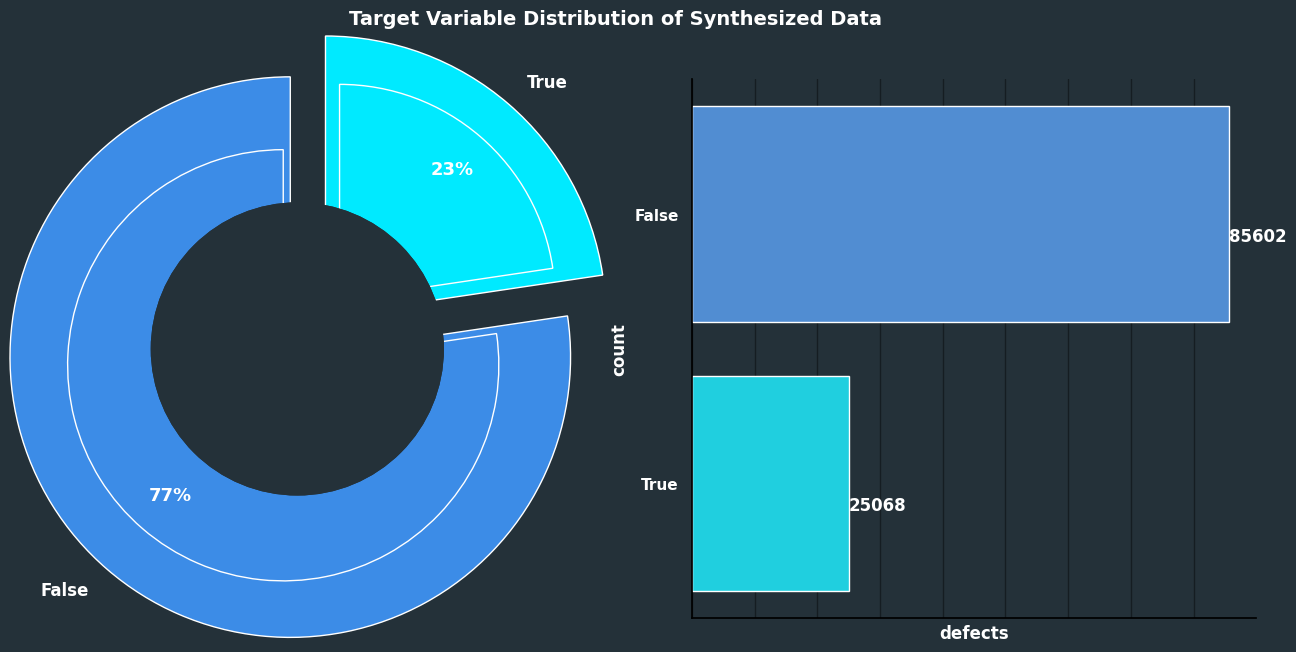

In [14]:
plot(train, 'defects', 'Target Variable Distribution of Synthesized Data')

In [15]:
print(train["defects"].unique())

[False  True]


In [16]:
train["defects"]=train["defects"].map({False: 0,
                                True: 1})

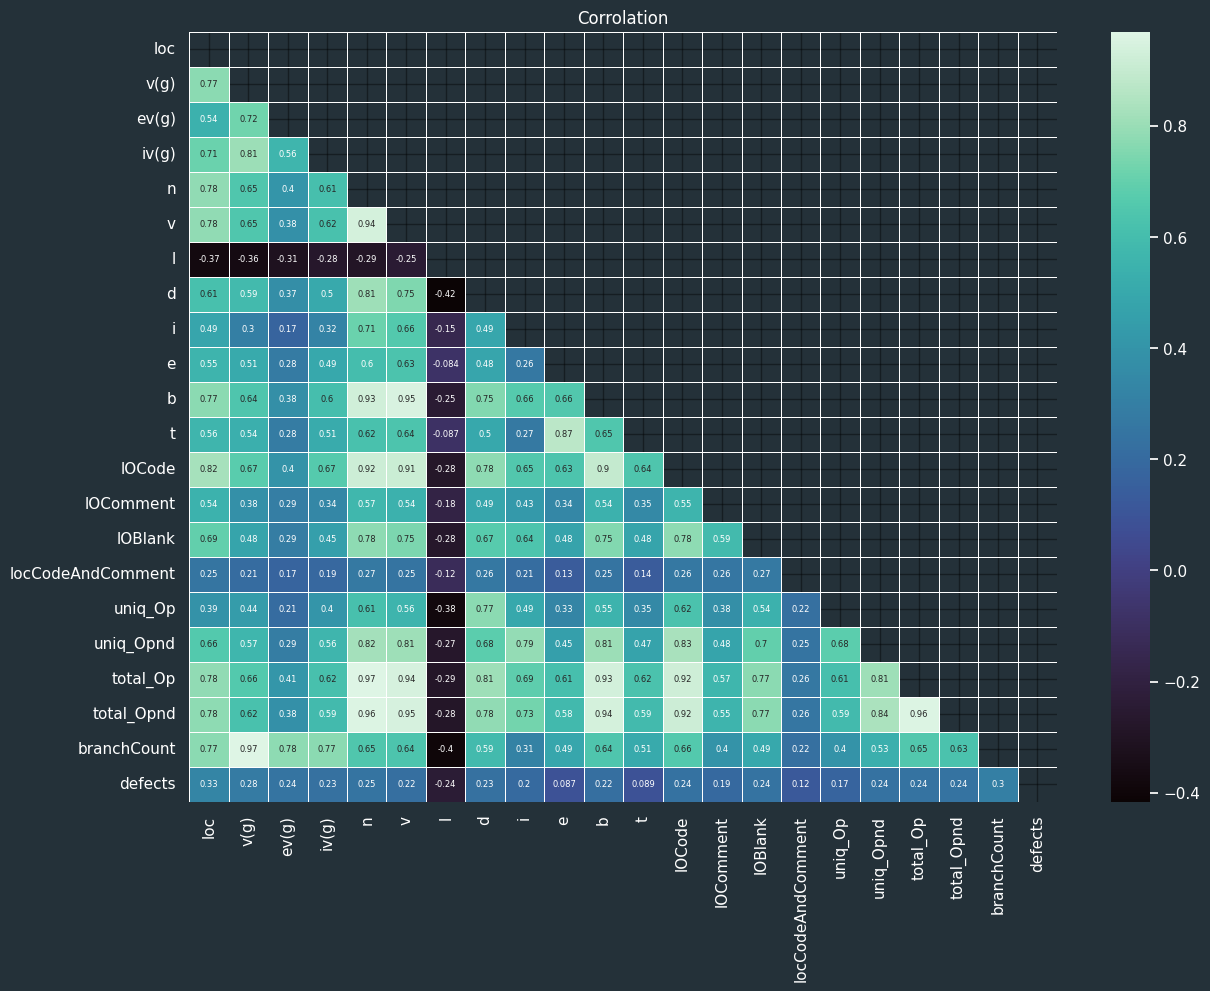

In [17]:

train = train.copy()
columns = [col for col in train.columns] 
corr = train[columns].corr()
fig, axes = plt.subplots(figsize=(14, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='mako', annot=True, annot_kws={"size": 6})
plt.title('Corrolation', color='white')
plt.show()


In [18]:
train.head(2)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0


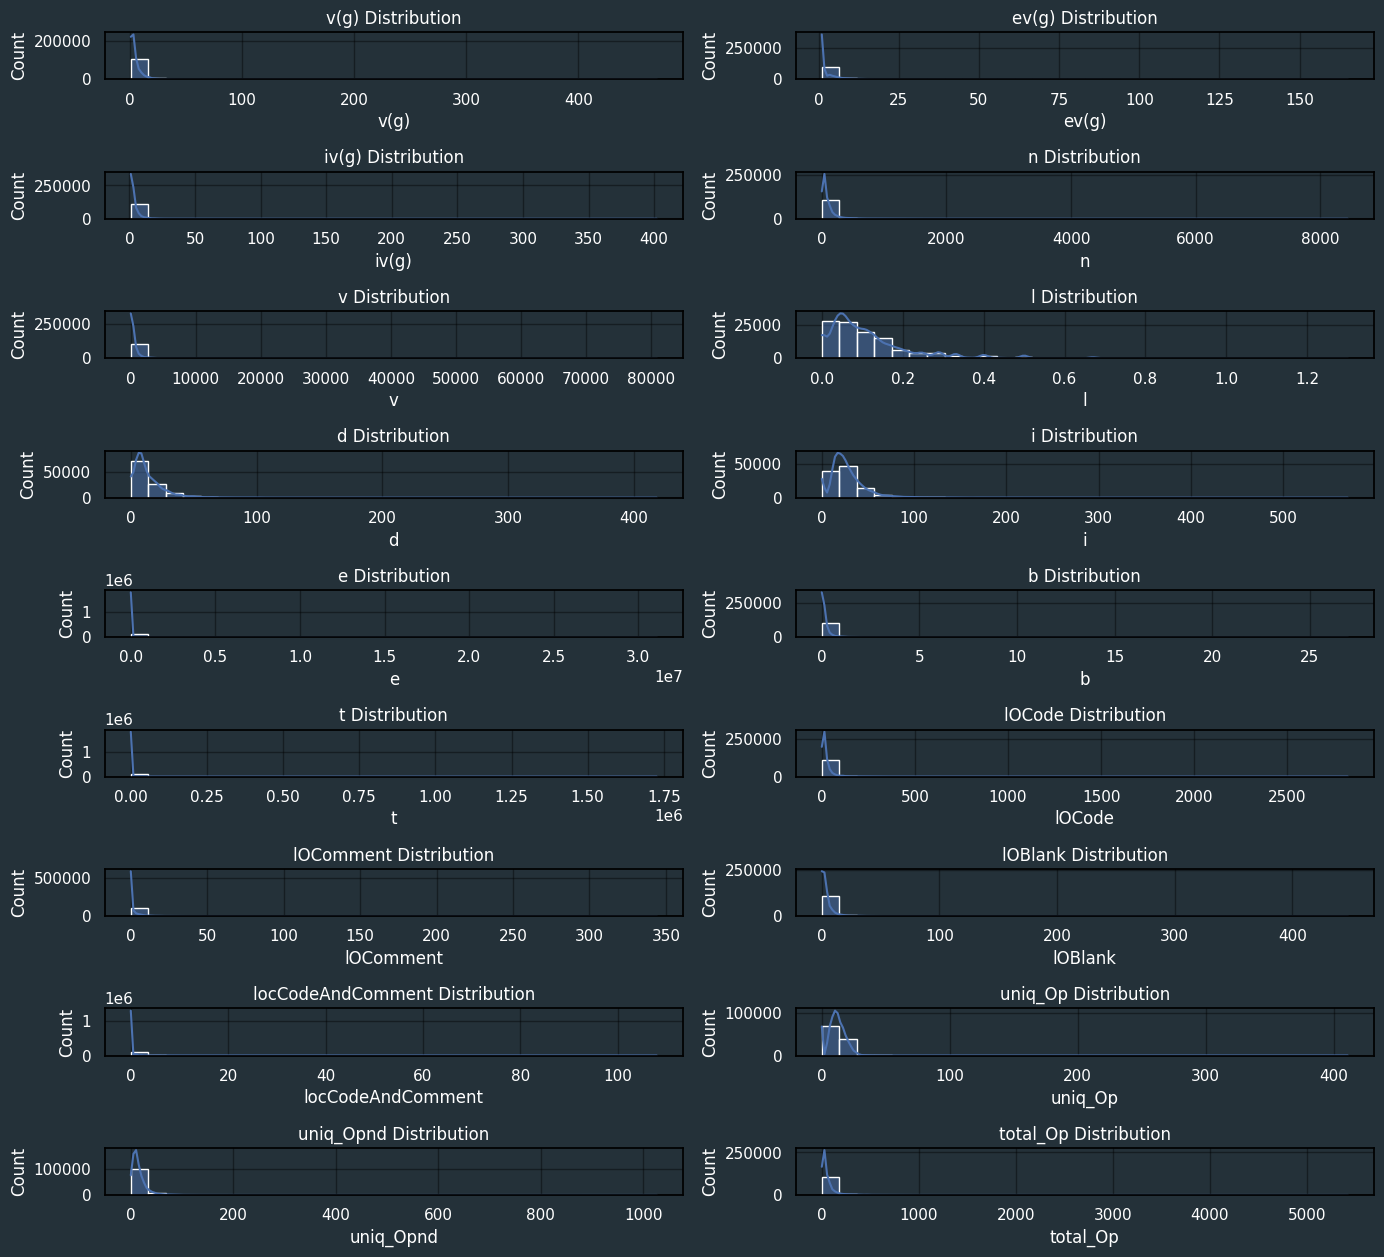

In [19]:
plt.figure(figsize=(14,15))
for idx,column in enumerate(columns[1:-3]):
    plt.subplot(len(columns)//2,2,idx+1)
    sns.histplot(train[column], bins=30, kde=True)
    plt.title(f"{column} Distribution",color='white')
    plt.tight_layout()

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Spliting⬇️</p>

In [20]:
from sklearn.model_selection import train_test_split
X = train.drop(columns=["defects"] )
y= train["defects"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 30)


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Feature Selection⬇️</p>

In [21]:
%pip install autofeatselect

Note: you may need to restart the kernel to use updated packages.


In [22]:
from autofeatselect import FeatureSelector
nemuric_columns=[]
nemuric_columns = list(X_train.columns)
categorical_columns=[]

feat_selector = FeatureSelector(
    modeling_type='classification',
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test,
    numeric_columns=nemuric_columns,
    categorical_columns=categorical_columns,
    seed=42
)

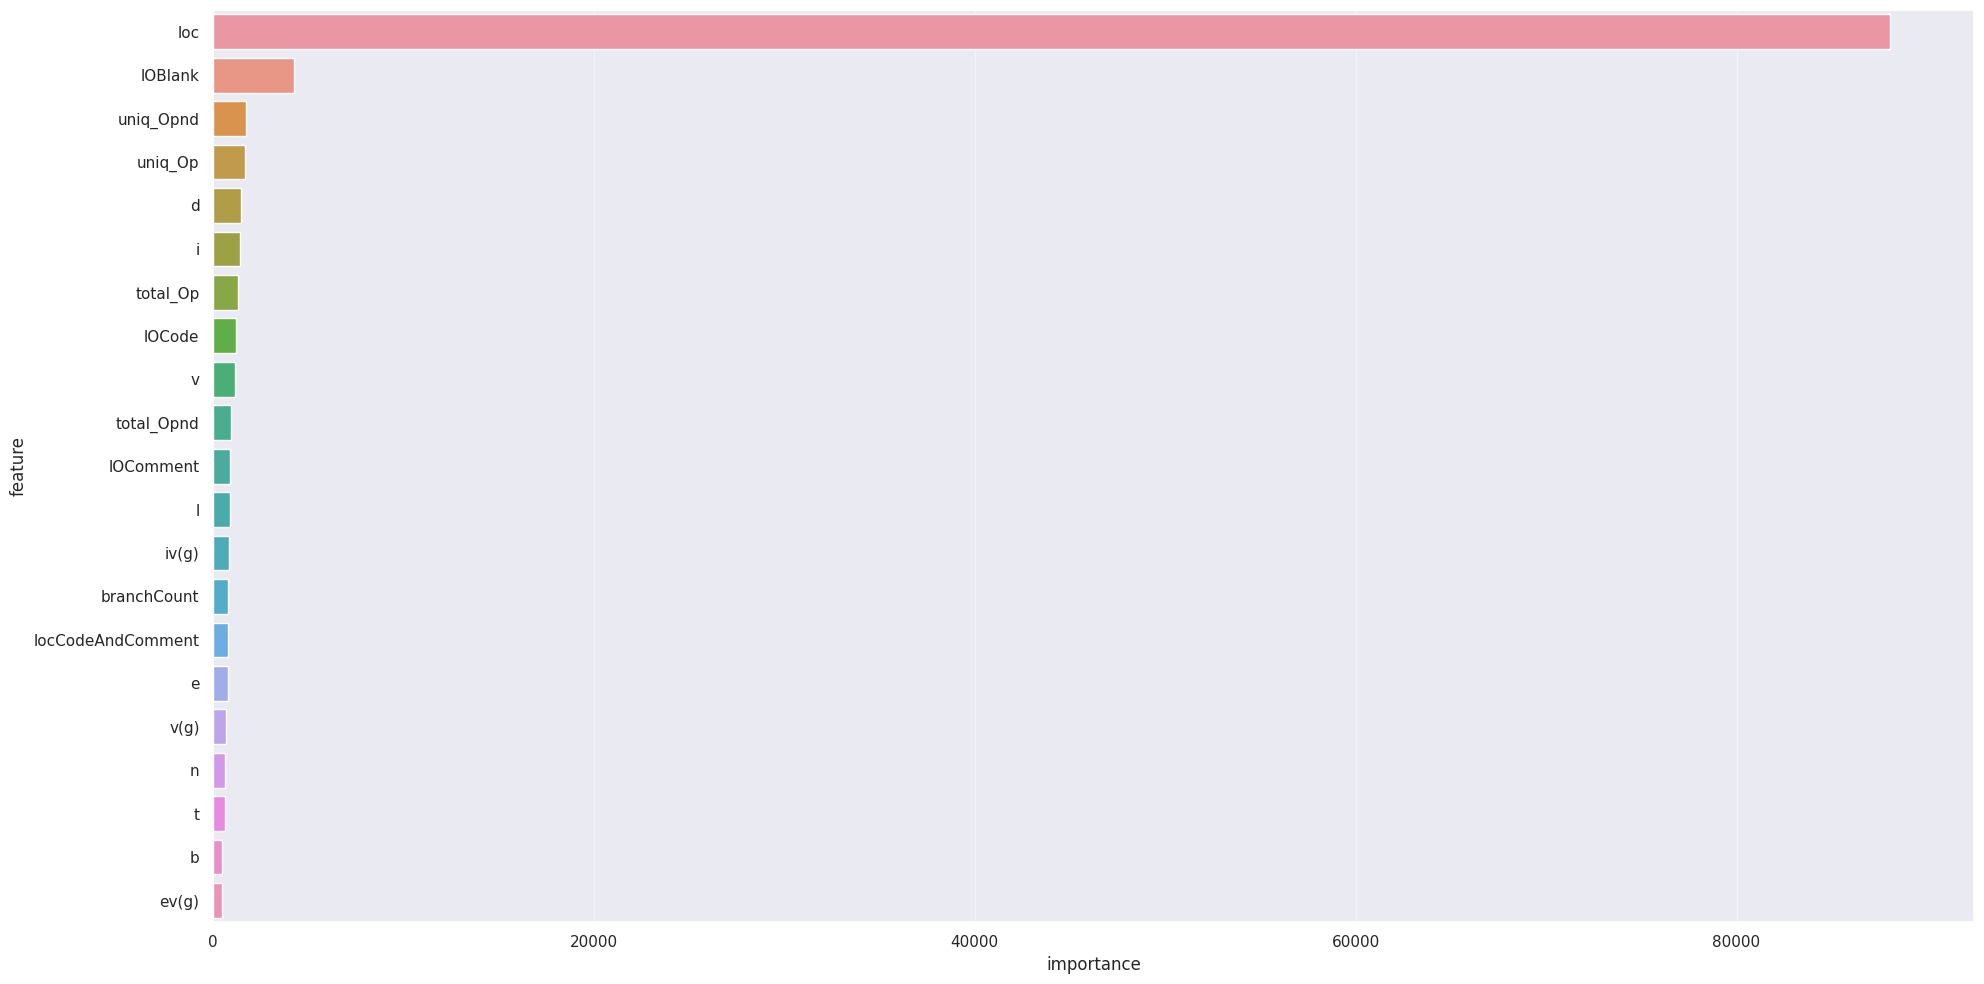

In [23]:
lgbm_importance_train = feat_selector.lgbm_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)

In [24]:
lgbm_importance_train.tail(3)

,feature,importance
18,t,649.129295
19,b,484.827038
20,ev(g),466.265732


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️Scaling⬇️</p>

In [25]:
cols=[]
cols = train.drop(columns = ['defects'], axis = 1).columns.tolist()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('log_transform', ColumnTransformer([('log', FunctionTransformer(np.log1p), cols)])), 
                   ('stand', StandardScaler())])
X_train =pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)

In [26]:


X_train= pd.DataFrame(X_train,columns=cols)
y_train =pd.DataFrame(y_train)
X_test= pd.DataFrame(X_test)
y_test =pd.DataFrame(y_test)
X_train.head(1)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,-0.085197,0.506193,0.490488,0.138331,-2.618378,-2.750583,-1.194494,-2.417693,-2.939677,-2.609267,-0.711487,-2.105632,-2.298726,-0.554009,-1.445296,-0.274393,-2.956255,-2.524498,-2.498755,-2.341266,0.582848


# <p style="background-color:#40BF80; font-family:newtimeroman;color:#FFFFFF; font-size:150% ; text-align:center; border-radius: 50px 15px;"> 🔻Model 🔻</p>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️LazyClassifier⬇️</p>

In [27]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [28]:
# from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit( X_train, X_test , y_train, y_test)
# models

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:center;padding: 0px; border-bottom: 4px solid #003300">⬇️LGBMClassifier⬇️</p>



In [29]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score


nfolds = 10
skfold = StratifiedKFold(n_splits=nfolds,shuffle=True,random_state=0)


# Grid Search
param_grid = {
    'boosting_type': ['gbdt'],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.1, 0.05],
    'max_depth': [-1],
    'min_child_samples': [20],
    'min_child_weight': [0.001],
    'min_split_gain': [0.0],
    'n_jobs': [-1],
    'num_leaves': [8, 16],
    'random_state': [None],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5],
    'subsample': [1.0],
    'subsample_for_bin': [200000],
    'subsample_freq': [0],
    'verbose': [-1],
    'objective': ['binary'],
    'metric': [['auc']],
    'num_iterations': [100],
    'early_stopping_round': [None]
}

grid_search = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid, cv=skfold, scoring='roc_auc')
grid_search.fit(X, y)

print("Best parameters found:")
print(grid_search.best_params_)
print("Best AUC score found:")
print(grid_search.best_score_)

# Use best model for prediction
best_model = grid_search.best_estimator_
prediction = best_model.predict_proba(test.drop('id',axis=1))[:, 1]

Best parameters found:
{'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'early_stopping_round': None, 'learning_rate': 0.1, 'max_depth': -1, 'metric': ['auc'], 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_iterations': 100, 'num_leaves': 16, 'objective': 'binary', 'random_state': None, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1}
Best AUC score found:
0.785097233127439


In [30]:
grid_search.fit(X, y)

print("Best parameters found:")
print(grid_search.best_params_)
print("Best AUC score found:")
print(grid_search.best_score_)

# Use best model for prediction
best_model = grid_search.best_estimator_
prediction = best_model.predict_proba(test.drop('id',axis=1))[:, 1]

Best parameters found:
{'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'early_stopping_round': None, 'learning_rate': 0.1, 'max_depth': -1, 'metric': ['auc'], 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_iterations': 100, 'num_leaves': 16, 'objective': 'binary', 'random_state': None, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1}
Best AUC score found:
0.785097233127439


In [31]:
sub['defects'] = prediction
sub.to_csv('/kaggle/working/submission.csv', index=False)
sub

,id,defects
0,101763,0.260983
1,101764,0.198933
2,101765,0.639227
3,101766,0.400020
4,101767,0.141725
...,...,...
67837,169600,0.285999
67838,169601,0.136042
67839,169602,0.169125
67840,169603,0.104013
